In [ ]:
pip install psx-data-reader

In [ ]:
from psx import stocks, tickers
import matplotlib.pyplot as plt
import datetime
import pandas as pd
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import numpy as np


In [ ]:
df = stocks("SYS", start=datetime.date(2017, 1, 1), end=datetime.date(2021, 9, 7))

In [ ]:
df.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-02,85.25,85.89,84.33,84.44,103500.0
2017-01-03,84.50,85.00,83.40,84.65,109000.0
2017-01-04,84.00,84.89,82.50,82.66,160000.0
2017-01-05,82.70,82.70,81.77,82.02,96500.0
2017-01-06,82.00,83.50,82.00,83.08,101000.0


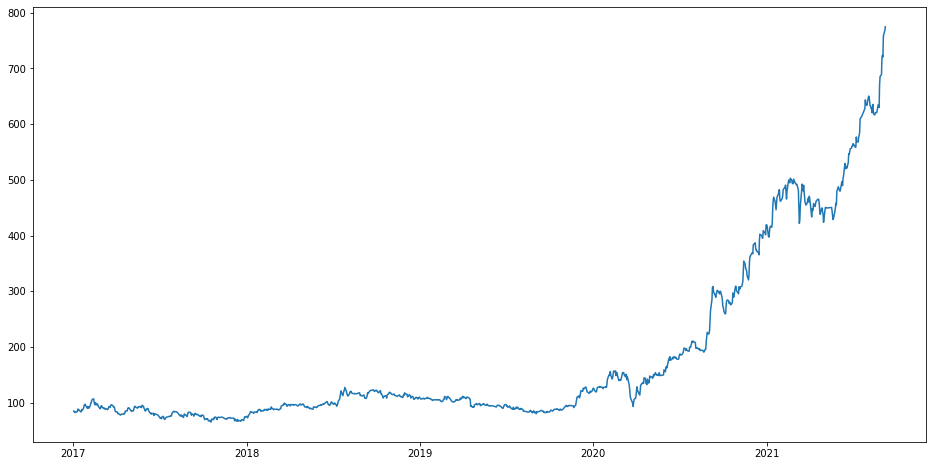

In [ ]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [ ]:
#creating dataframe with date and the target variable
df.reset_index(inplace=True)
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [ ]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [ ]:
new_data.head(5)

,Close
Date,
2017-01-02,84.44
2017-01-03,84.65
2017-01-04,82.66
2017-01-05,82.02
2017-01-06,83.08


In [ ]:
cl = new_data.Close.astype('float32')
train = cl[0:int(len(cl)*0.80)]
scl = MinMaxScaler()
#Scale the data
scl.fit(train.values.reshape(-1,1))
cl =scl.transform(cl.values.reshape(-1,1))
#Create a function to process the data into lb observations look back slices
# and create the train test dataset (90-10)
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
 
 
lb=10
X,y = processData(cl,lb)
X_train,X_test = X[:int(X.shape[0]*0.90)],X[int(X.shape[0]*0.90):]
y_train,y_test = y[:int(y.shape[0]*0.90)],y[int(y.shape[0]*0.90):]
print(X_train.shape[0],X_train.shape[1])
print(X_test.shape[0], X_test.shape[1])
print(y_train.shape[0])
print(y_test.shape[0])

1022 10
114 10
1022
114


In [ ]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(lb,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
 
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
 
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)
 
model.summary() 

Epoch 1/300
32/32 [==============================] - 4s 56ms/step - loss: 0.0049 - val_loss: 0.0117
Epoch 2/300
32/32 [==============================] - 1s 39ms/step - loss: 0.0059 - val_loss: 0.0172
Epoch 3/300
32/32 [==============================] - 1s 40ms/step - loss: 0.0182 - val_loss: 0.0566
Epoch 4/300
32/32 [==============================] - 1s 39ms/step - loss: 0.0616 - val_loss: 0.0616
Epoch 5/300
32/32 [==============================] - 1s 41ms/step - loss: 0.0324 - val_loss: 0.1357
Epoch 6/300
32/32 [==============================] - 1s 40ms/step - loss: 0.0073 - val_loss: 0.0191
Epoch 7/300
32/32 [==============================] - 1s 40ms/step - loss: 0.0090 - val_loss: 0.0488
Epoch 8/300
32/32 [==============================] - 1s 40ms/step - loss: 0.0618 - val_loss: 0.3663
Epoch 9/300
32/32 [==============================] - 1s 40ms/step - loss: 0.0169 - val_loss: 0.0486
Epoch 10/300
32/32 [==============================] - 1s 40ms/step - loss: 0.0224 - val_loss: 0.0335

Text(0.5, 1.0, 'Train Dataset')

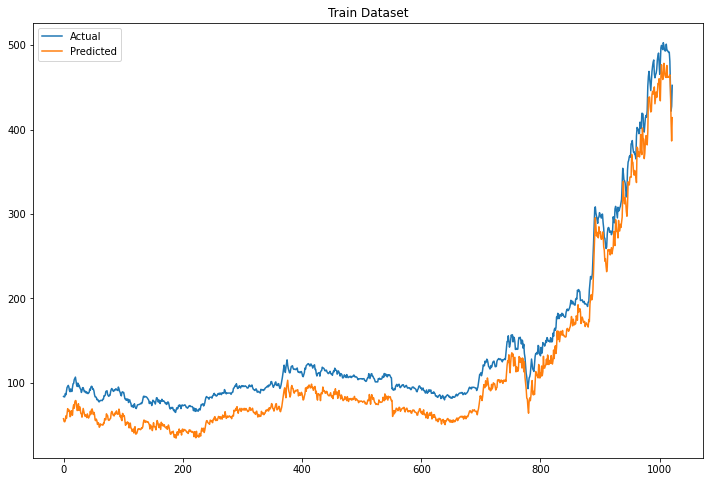

In [ ]:
plt.figure(figsize=(12,8))
 
Xt = model.predict(X_train)
plt.plot(scl.inverse_transform(y_train.reshape(-1,1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Predicted")
plt.legend()
plt.title("Train Dataset")

Text(0.5, 1.0, 'Test Dataset')

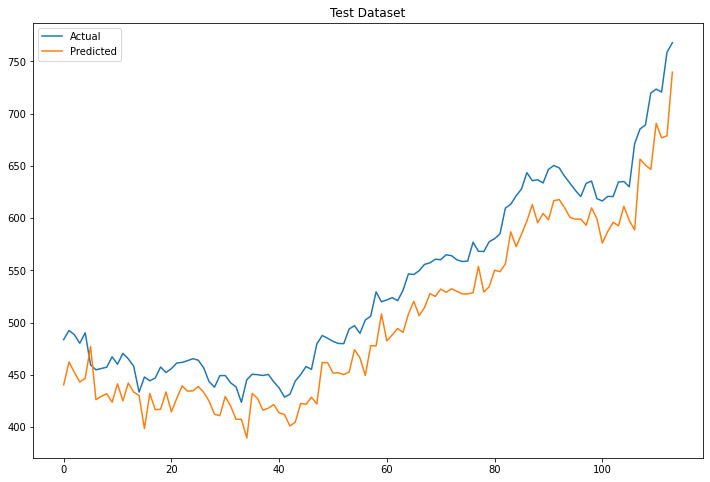

In [ ]:
plt.figure(figsize=(12,8))
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Predicted")
plt.legend()
plt.title("Test Dataset")

In [ ]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Text(0.5, 1.0, 'Test Dataset 250 Obs Ahead')

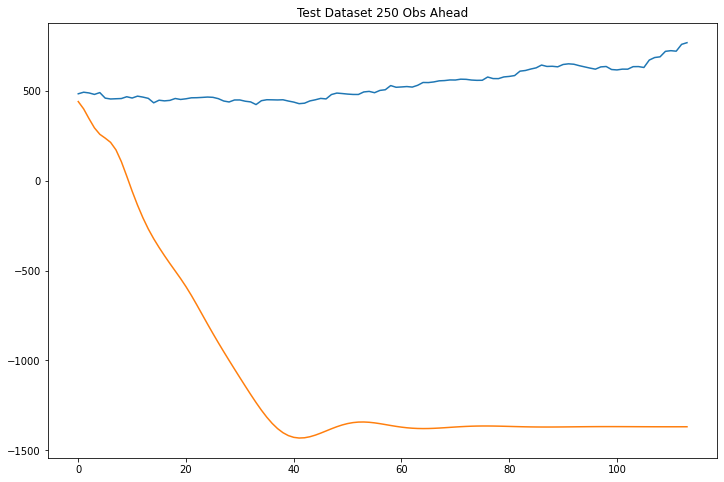

In [ ]:
def processData(data,lb):
    X= []
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
    return np.array(X)
 
# create the x_test_dummy
cl2 =cl.copy()
pred = []
for i in range(X_test.shape[0]):
    cl2[int(X.shape[0]*0.90)+i+lb] = model.predict(X_test)[i]
    pred.extend(model.predict(X_test)[i])
    X = processData(cl2,lb)
    X_train,X_test = X[:int(X.shape[0]*0.90)],X[int(X.shape[0]*0.90):]
    X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
 
 
 
prediction = scl.inverse_transform(np.array(pred).reshape(-1, 1))
plt.figure(figsize=(12,8))
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)),  label="Actual")
plt.plot(prediction, label="Predicted")
 
plt.title("Test Dataset 250 Obs Ahead")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


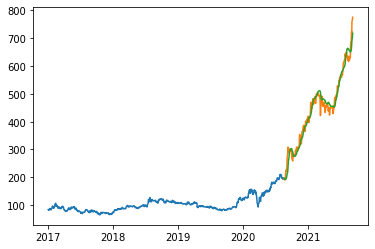

In [ ]:
#for plotting
train = new_data[:885]
valid = new_data[885:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])